In [ ]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#removing warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#readin the dataset
co2_vehicles=pd.read_csv("/content/uk_gov_data_sparse_preproc.csv",encoding='ISO-8859-1')
df=co2_vehicles.copy()
df.head()

,car_id,manufacturer,model,description,transmission,transmission_type,engine_size_cm3,fuel,powertrain,power_ps,co2_emissions_gPERkm
0,1.0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,161.0
1,2.0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,153.0
2,3.0,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,169.0
3,4.0,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,162.0
4,5.0,ABARTH,595,595 1.4 145 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,169.0


In [ ]:
#getting  information about features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6756 entries, 0 to 6755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                6756 non-null   float64
 1   manufacturer          6756 non-null   object 
 2   model                 6756 non-null   object 
 3   description           6756 non-null   object 
 4   transmission          6609 non-null   object 
 5   transmission_type     6756 non-null   object 
 6   engine_size_cm3       6755 non-null   float64
 7   fuel                  6756 non-null   object 
 8   powertrain            6756 non-null   object 
 9   power_ps              6712 non-null   float64
 10  co2_emissions_gPERkm  6756 non-null   float64
dtypes: float64(4), object(7)
memory usage: 580.7+ KB




> Data has only float,object and integer values.



In [ ]:
#finding number of rows and columns
df.shape

(6756, 11)



> Dataset has 6756 rows and 11 features



In [ ]:
#features in dataset
df.columns

Index(['car_id', 'manufacturer', 'model', 'description', 'transmission',
       'transmission_type', 'engine_size_cm3', 'fuel', 'powertrain',
       'power_ps', 'co2_emissions_gPERkm'],
      dtype='object')

In [ ]:
#null values of features
df.isna().sum().sort_values(ascending=False)

transmission            147
power_ps                 44
engine_size_cm3           1
car_id                    0
manufacturer              0
model                     0
description               0
transmission_type         0
fuel                      0
powertrain                0
co2_emissions_gPERkm      0
dtype: int64

In [ ]:
#mputing
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df)

,Total,Percent
transmission,147,2.175844
power_ps,44,0.651273
engine_size_cm3,1,0.014802
car_id,0,0.000000
manufacturer,0,0.000000
model,0,0.000000
description,0,0.000000
transmission_type,0,0.000000
fuel,0,0.000000
powertrain,0,0.000000


the dataset has 3% missing values in the features of transmission,power_ps and engine_size_cm3

In [ ]:
##filling  missing values of numerical features
df["power_ps"]=df["power_ps"].fillna(df["power_ps"].mean())
df["engine_size_cm3"]=df["engine_size_cm3"].fillna(df["engine_size_cm3"].mean())

filled the null values of power_ps and engine_size_cm3

In [ ]:
#remaining null values in transmission_type
df.isna().sum()

car_id                    0
manufacturer              0
model                     0
description               0
transmission            147
transmission_type         0
engine_size_cm3           0
fuel                      0
powertrain                0
power_ps                  0
co2_emissions_gPERkm      0
dtype: int64

In [ ]:
# impute transmission feature with most_frequent values
from sklearn.impute import SimpleImputer
impute_mode = SimpleImputer(strategy = 'most_frequent')
impute_mode.fit(df[['transmission']])
df["transmission"]=impute_mode.transform(df[["transmission"]])

In [ ]:
df.isna().sum()

car_id                  0
manufacturer            0
model                   0
description             0
transmission            0
transmission_type       0
engine_size_cm3         0
fuel                    0
powertrain              0
power_ps                0
co2_emissions_gPERkm    0
dtype: int64

In [ ]:
#finding the duplicated data
df.duplicated().sum()

0

the dataset has no duplicate values

In [ ]:
#displayig the statistical information
df.describe()

,car_id,engine_size_cm3,power_ps,co2_emissions_gPERkm
count,6756.000000,6756.000000,6756.000000,6756.000000
mean,3378.500000,1793.553516,185.494636,154.775607
std,1950.433542,825.634533,108.742786,54.972233
min,1.000000,0.000000,0.000000,0.000000
25%,1689.750000,1333.000000,120.000000,131.000000
50%,3378.500000,1749.000000,150.000000,151.000000
75%,5067.250000,1996.000000,211.000000,179.250000
max,6756.000000,6749.000000,800.000000,380.000000


VISULAIZATION

In [ ]:
corr=df.corr()

<Axes: >

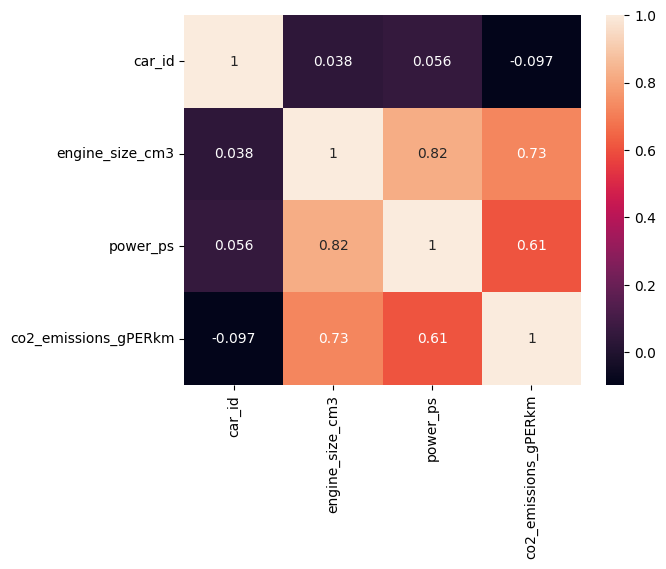

In [ ]:
sns.heatmap(data=corr,annot=True)

the dataset has no multicollinearity

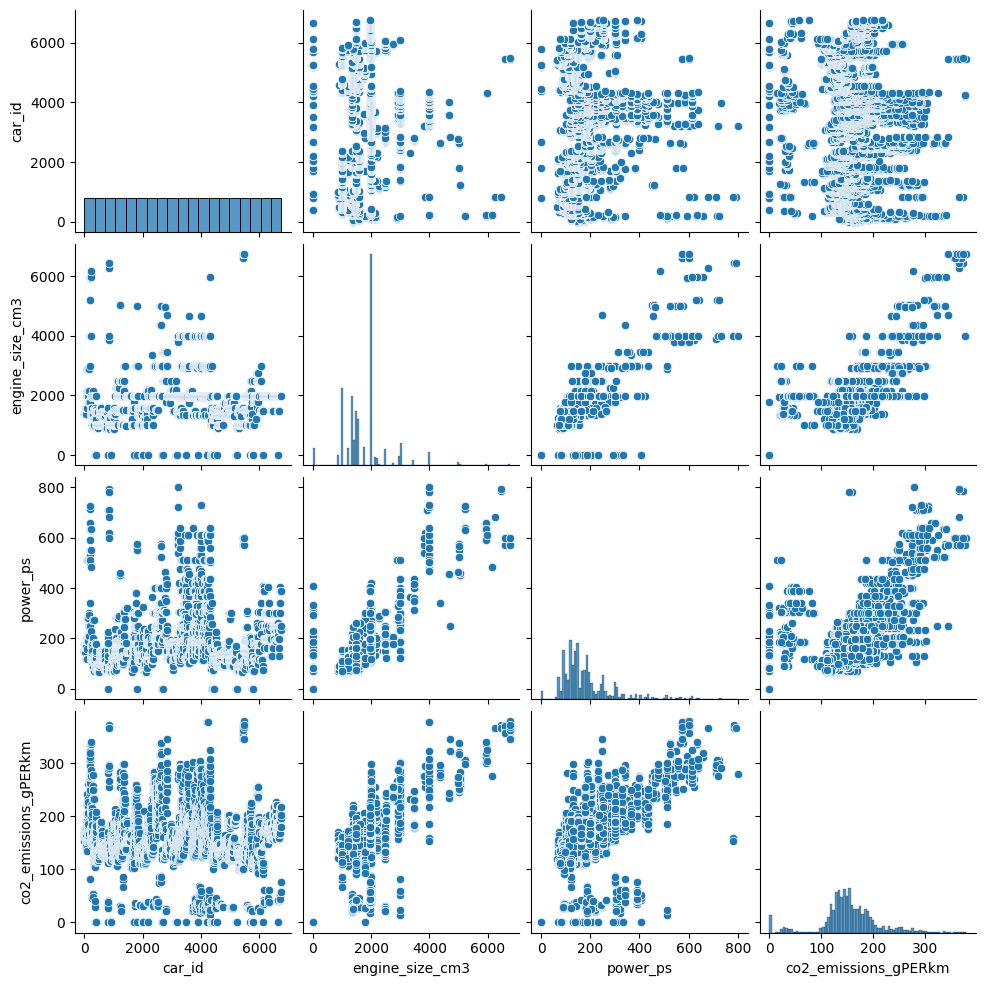

In [ ]:
sns.pairplot(df)
plt.show()

the relationship with each feature is visualized in above grap

In [ ]:
#categries in feature
df.nunique()

car_id                  6756
manufacturer              41
model                    440
description             2981
transmission              42
transmission_type          3
engine_size_cm3          112
fuel                       8
powertrain                 6
power_ps                 201
co2_emissions_gPERkm     290
dtype: int64

Manufacture feature visualization with target variables

In [ ]:

df["manufacturer"].value_counts()

MERCEDES-BENZ           1106
RENAULT                  890
VOLVO                    625
KIA                      529
DACIA                    382
MAZDA                    361
TOYOTA                   352
FORD                     307
LAND ROVER               291
HONDA                    260
SEAT                     211
FIAT                     203
LEXUS                    152
PEUGEOT                  142
JAGUAR                   105
CITROEN                   98
HYUNDAI                   94
CHRYSLER JEEP             92
ALFA ROMEO                85
ABARTH                    60
NISSAN                    50
SSANGYONG                 32
DS                        32
ALPINE                    32
MASERATI                  31
SUZUKI                    30
GENESIS                   29
MG MOTORS UK              25
ASTON MARTIN LAGONDA      22
Rolls Royce               20
BENTLEY MOTORS            18
SUBARU                    16
FERRARI                   14
SMART                     12
TESLA         

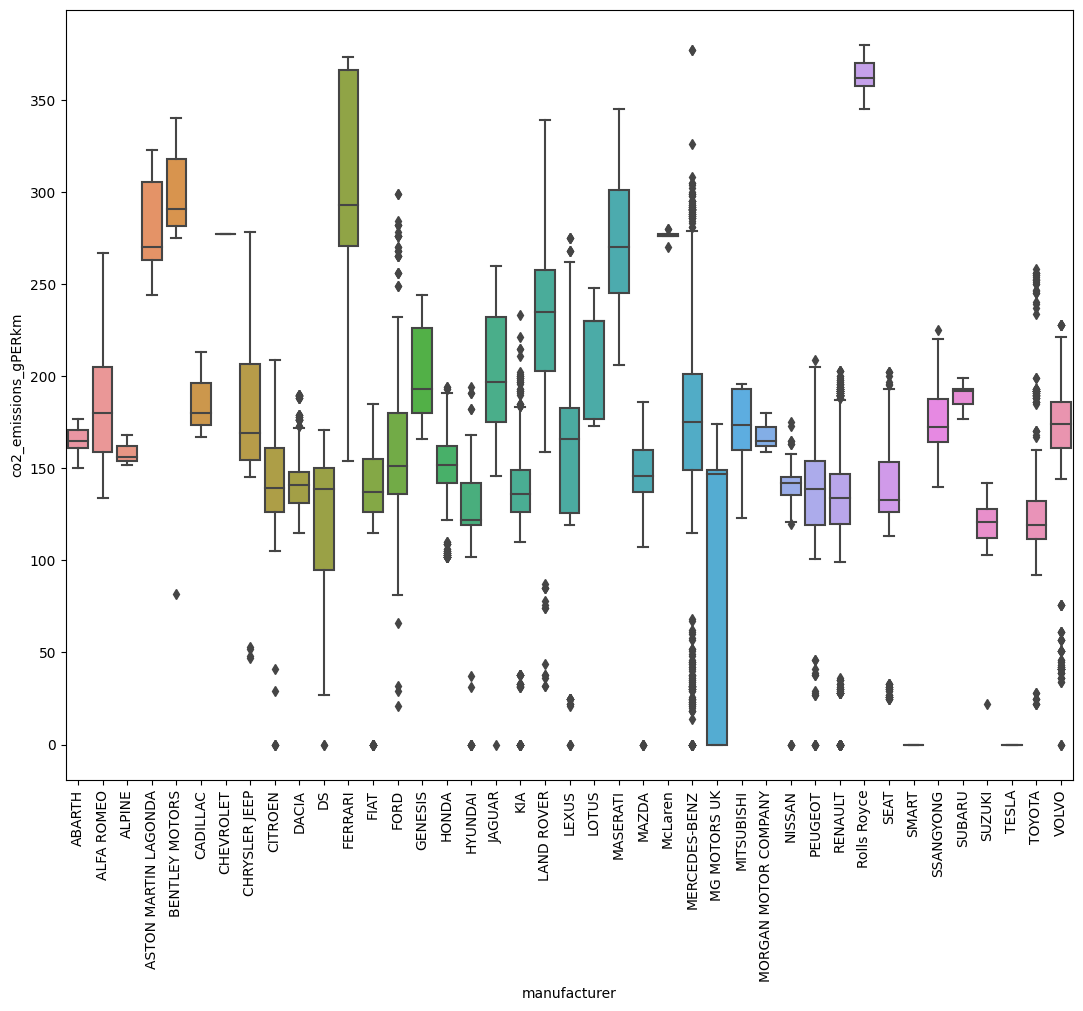

In [ ]:
plt.figure(figsize=(13,10))
sns.boxplot(x=df["manufacturer"],y=df["co2_emissions_gPERkm"])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Chevrolet and Cadillac have very little data
df.manufacturer.value_counts()[::-1][:5]


CHEVROLET               2
CADILLAC                3
MORGAN MOTOR COMPANY    3
MITSUBISHI              8
LOTUS                   9
Name: manufacturer, dtype: int64

  MODEL  feature visualization with target variables

In [ ]:
len(df["model"].unique())

440

In [ ]:
#Leading models
lead_model=df["model"].value_counts()[:20]
lead_model

CAPTUR              206
Duster              192
Clio                188
XC40, MY21          146
Kadjar              104
Vito Tourer          96
XC60, MY21           96
Mégane Hatch         90
CX-30                88
Defender, 20MY       80
CR-V 2021            79
Dacia Sandero        78
Mazda CX-5           77
Civic 2021           73
500                  72
Mazda3               68
Logan MCV            66
CR-V Hybrid 2022     65
595                  60
XC40, MY22           60
Name: model, dtype: int64

Text(0.5, 1.0, 'Countplot of leading models')

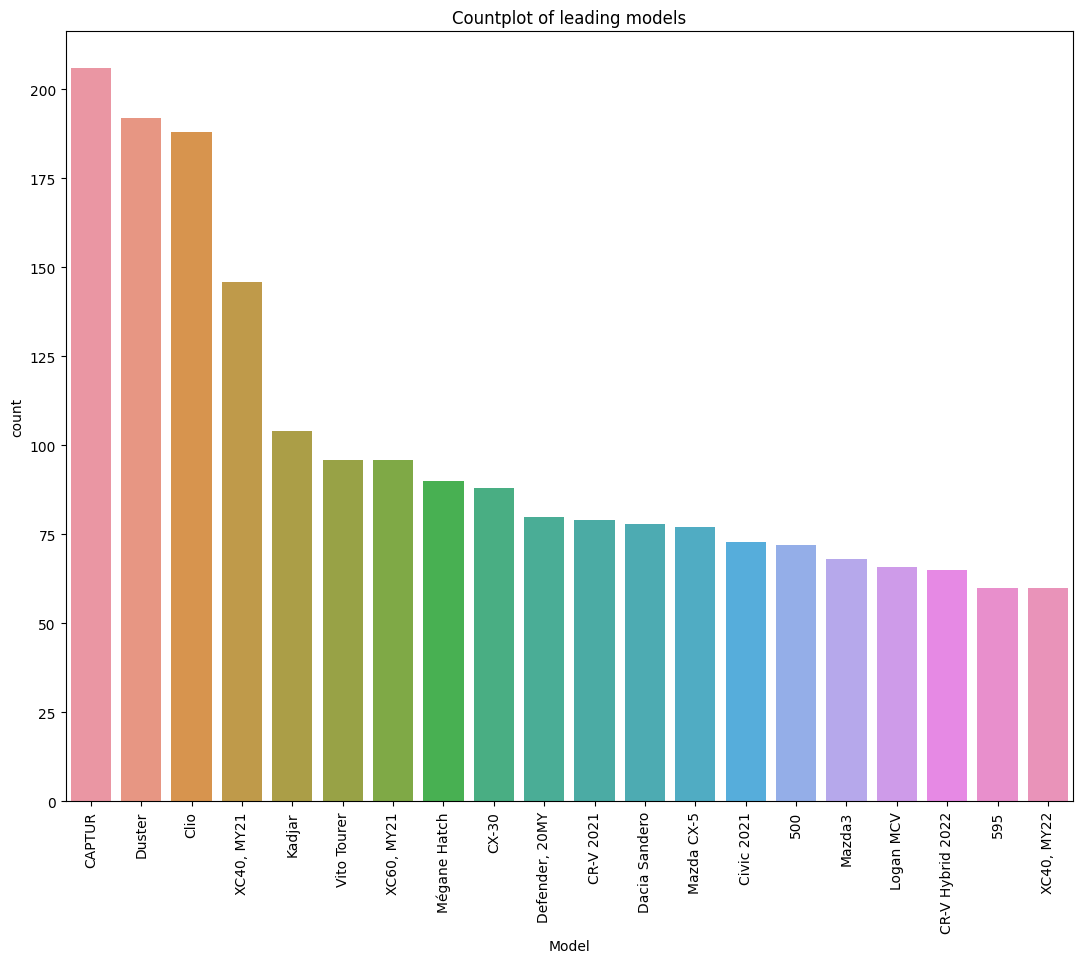

In [ ]:
plt.figure(figsize=(13,10))
sns.countplot(x="model",data=df,order=lead_model.index)
plt.xticks(rotation=90)
plt.xlabel("Model")
plt.ylabel("count")
plt.title("Countplot of leading models")

the captur and Duster has the higher count

Description  feature visualization with target variables

In [ ]:
len(df["description"].unique())

2981

TRANSMISSION  feature visualization with target variables

In [ ]:
df["transmission"].value_counts()

M6                    1656
A9                     654
A7                     606
A8                     605
M5                     442
A6                     430
8A-AWD                 326
CVT                    315
8AT                    271
A8-AWD                 254
E-CVT                  193
6MT                    167
A5                     130
DCT7                   128
A9-AWD                  93
MT6                     90
7DCT                    54
SAT5                    45
5MT                     31
6AT                     26
A1                      23
Automatic               21
DCT6                    19
Manual                  18
AT6                     18
MT5                     18
10 Speed Automatic      17
6-speed auto DCT        14
7A-FWD                  14
7SP. SSG                11
4AT                     11
AMT5                    10
AT1                      9
M6-AWD                   8
Auto                     6
DCT8                     6
SA6                      5
S

Text(0.5, 1.0, 'Countplot of transmission')

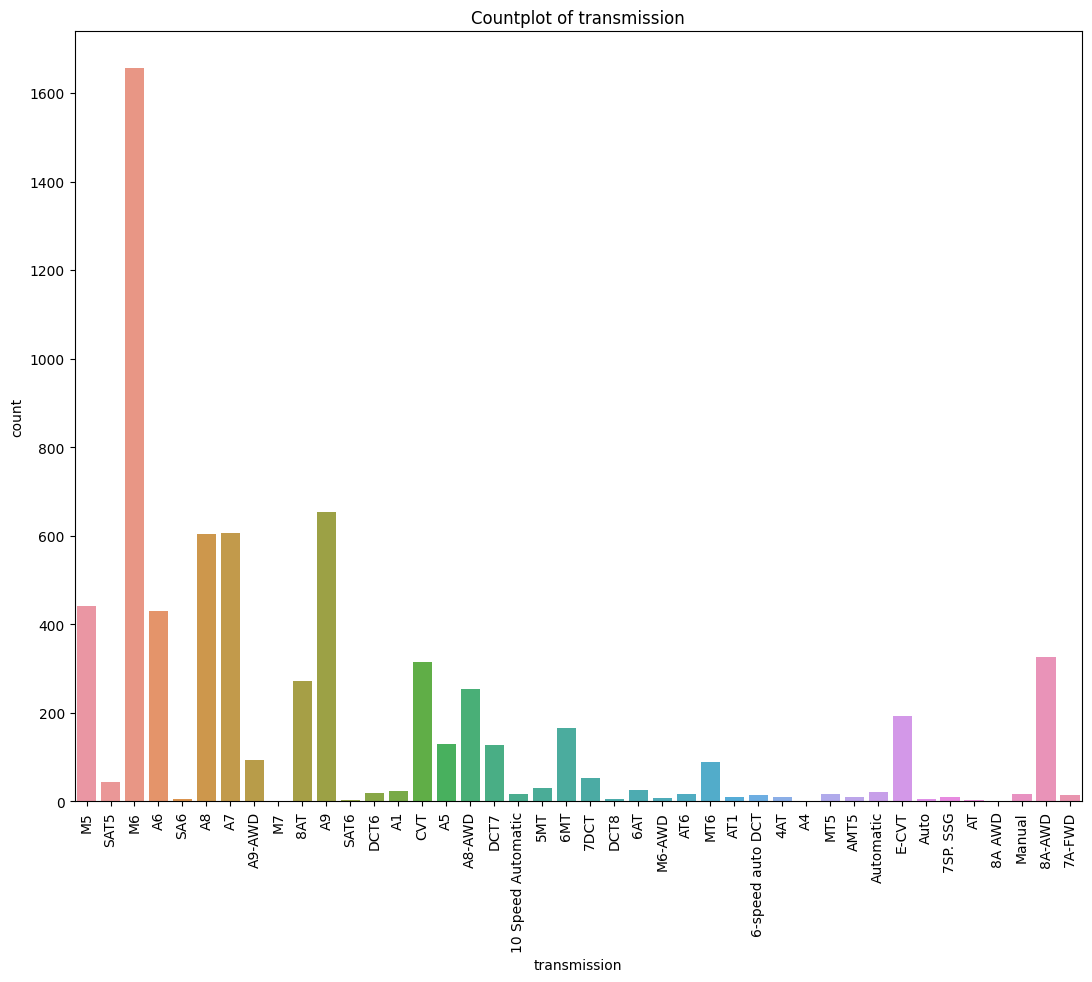

In [ ]:
plt.figure(figsize=(13,10))
sns.countplot(x="transmission",data=df)
plt.xticks(rotation=90)
plt.xlabel("transmission")
plt.ylabel("count")
plt.title("Countplot of transmission")

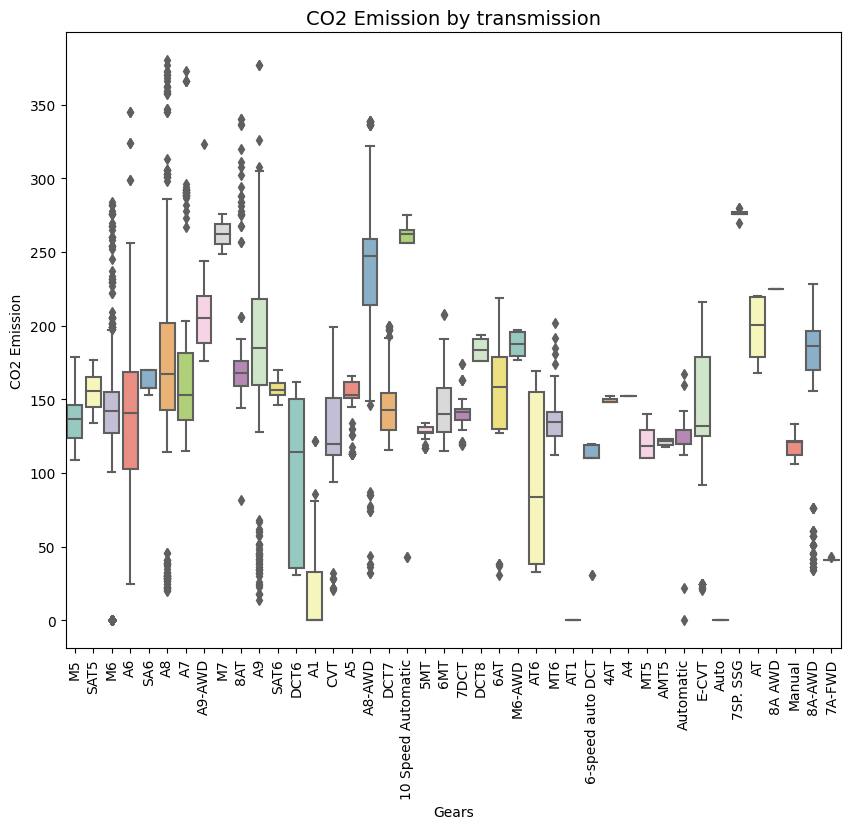

In [ ]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = "transmission", y = "co2_emissions_gPERkm", data = df, palette = 'Set3')

plt.title("CO2 Emission by transmission", fontsize = 14)
plt.xlabel("Gears")
plt.ylabel("CO2 Emission")
plt.xticks(rotation=90)

plt.show()

OBSERVATION:

> The M6 transmission has higher quantity

> There are outlier in each category





Transmission_type  feature visualization with target variables

In [ ]:
len(df["transmission_type"].unique())

3

([<matplotlib.patches.Wedge at 0x797f1c4302e0>,
 [Text(-0.48640295754540347, 0.9866165227134018, 'Automatic'),
  Text(0.4390776089459508, -1.008568715220885, 'Manual'),
  Text(1.098762921848455, -0.052154017784312154, 'Electric - Not Applicable')],
 [Text(-0.2653107041156746, 0.5381544669345828, '64.58%'),
  Text(0.23949687760688224, -0.5501283901204828, '33.91%'),
  Text(0.5993252300991572, -0.028447646064170263, '1.51%')])

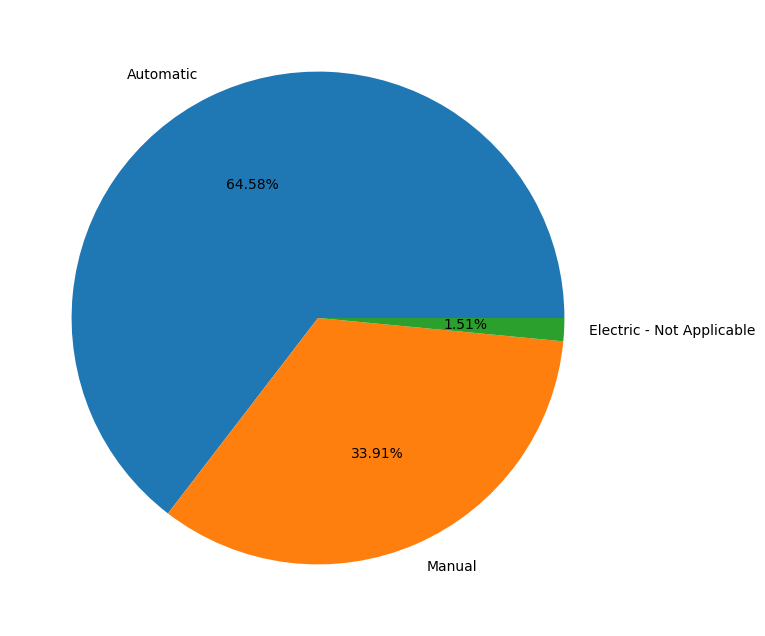

In [ ]:

transmission_counts = df.transmission_type.value_counts()
transmission_labels = transmission_counts.index
transmission_values = transmission_counts.values
plt.figure(figsize = (10, 8))
plt.pie(transmission_values, labels = transmission_labels, autopct = "%.2f%%")

Text(0, 0.5, 'counts')

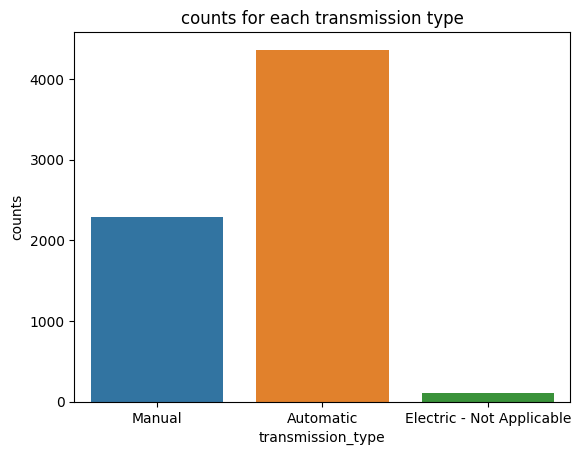

In [ ]:
sns.countplot(x="transmission_type",data=df)
plt.title("counts for each transmission type")
plt.xlabel("transmission_type")
plt.ylabel("counts")

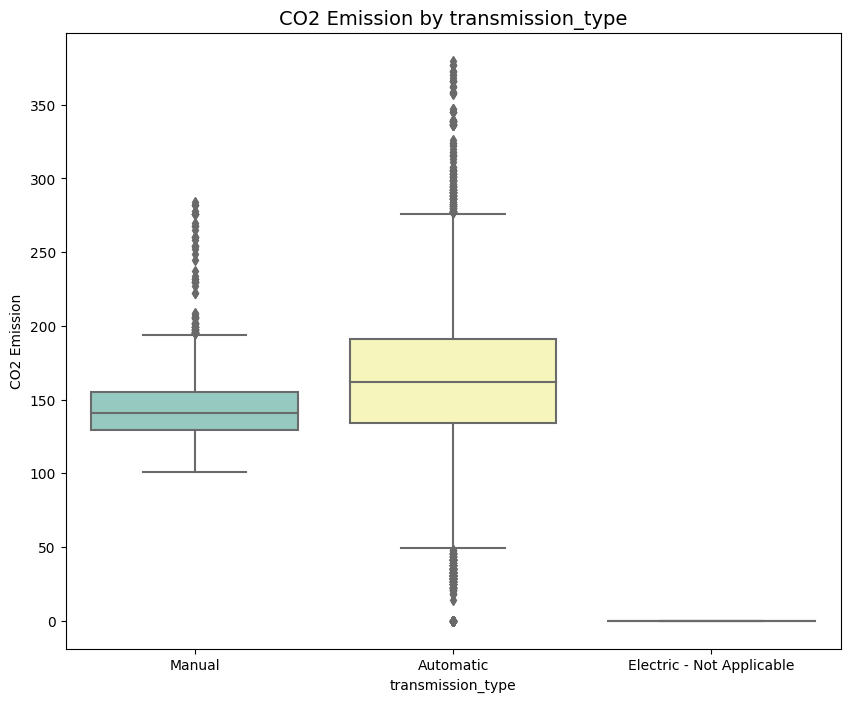

In [ ]:
plt.figure(figsize = (10, 8))
sns.boxplot(x ="transmission_type",y ="co2_emissions_gPERkm",data=df,palette='Set3')

plt.title("CO2 Emission by transmission_type", fontsize = 14)
plt.xlabel("transmission_type")
plt.ylabel("CO2 Emission")

plt.show()

Observation:

> Electric vehicles are less in number while comparing with automatic and manul automobiles

> there is no outliers in Electric due to less in number

> outliers are in manual and automatic transimission type








ENGINE SIZE feature(univariate) visualization with target variables



In [ ]:
print(np.array(sorted(df["engine_size_cm3"].unique())))

[   0.          875.          898.          988.          996.
  998.          999.         1084.         1193.         1197.
 1199.         1242.         1248.         1330.         1332.
 1333.         1353.         1368.         1373.         1386.
 1395.         1461.         1477.         1482.         1490.
 1496.         1497.         1498.         1499.         1580.
 1589.         1590.         1591.         1597.         1598.
 1600.         1618.         1749.         1759.         1793.55351591
 1798.         1799.         1950.         1951.         1956.
 1968.         1969.         1984.         1987.         1991.
 1992.         1993.         1995.         1996.         1997.
 1998.         1999.         2000.         2001.         2002.
 2003.         2143.         2151.         2157.         2191.
 2192.         2193.         2194.         2195.         2196.
 2199.         2261.         2487.         2488.         2494.
 2497.         2498.         2755.         2891

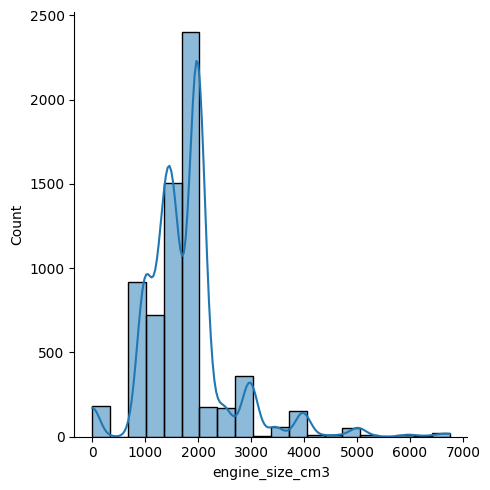

In [ ]:
sns.displot(data=df,x="engine_size_cm3",kde=True,bins=20)

<Axes: xlabel='co2_emissions_gPERkm', ylabel='engine_size_cm3'>

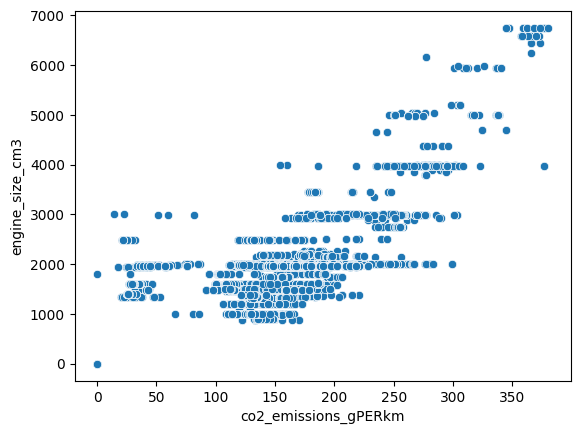

In [ ]:
sns.scatterplot(data=df,x="co2_emissions_gPERkm",y="engine_size_cm3")

Observation:

>the values are are more in range(1000,2000)

> the sctter plot shows the outliers and distribution of feature with target feature




FUEL TYPE feature(multivariate) visualization with target variables

In [ ]:
len(df["fuel"].unique())

8

In [ ]:
df["fuel"].value_counts()

Petrol                  3195
Diesel                  1564
Petrol Electric         1295
Diesel Electric          223
Electricity / Petrol     219
Electricity              180
Petrol / LPG              58
Electricity / Diesel      22
Name: fuel, dtype: int64

<Axes: xlabel='fuel', ylabel='count'>

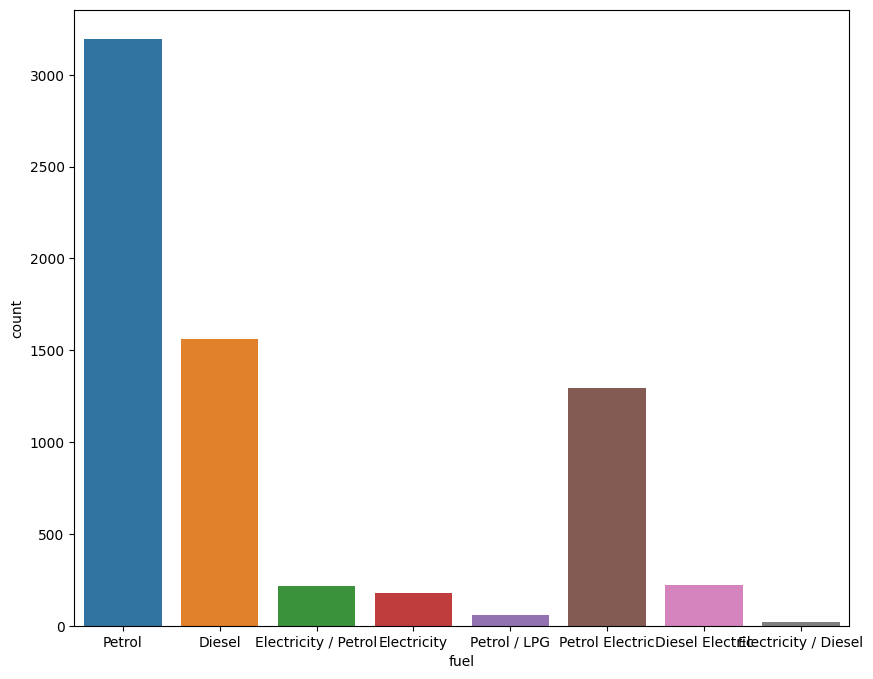

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x="fuel")

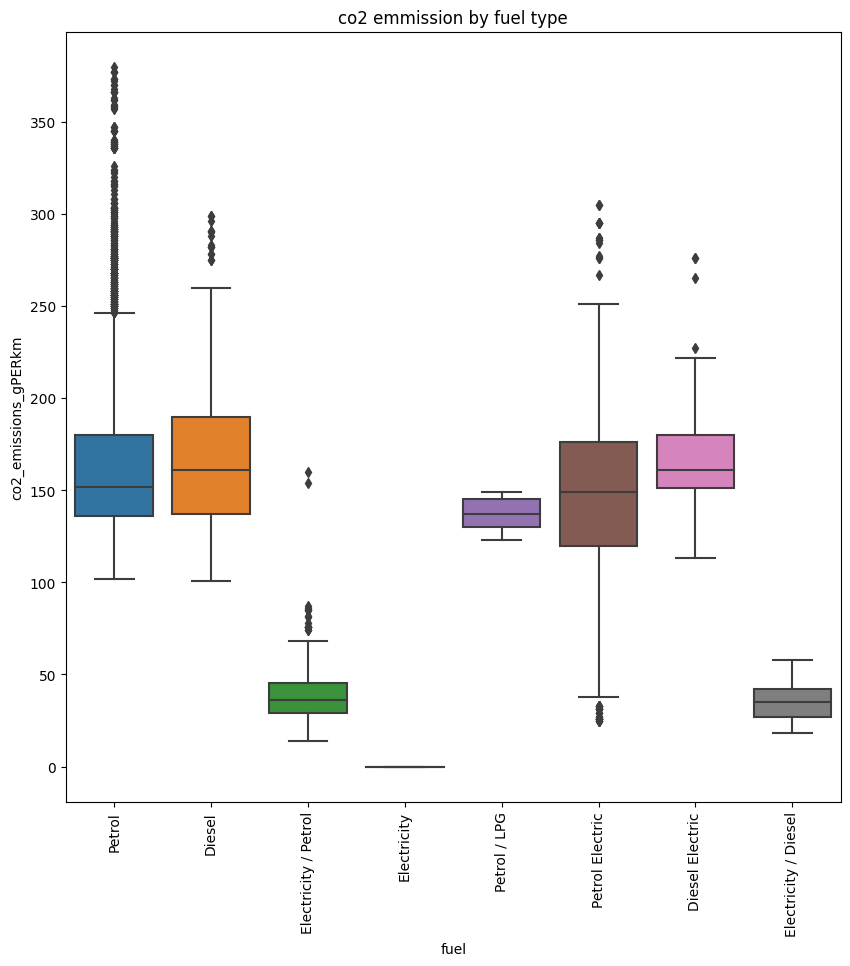

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x="fuel",y="co2_emissions_gPERkm",data=df)
plt.title("co2 emmission by fuel type")
plt.xticks(rotation=90)
plt.show()

Observation:

> The automobies using petrol and diesel are high in numbers

> outliers features:
1.Petrol
2.Diesel
3.Electricity/petrol
3.petrol electrical diesel
4.petrol/LPG


















POWERTRAIN Feature(multivariate) visualization with target variables

In [ ]:
df["powertrain"].value_counts()

Internal Combustion Engine (ICE)                                                  4745
Hybrid Electric Vehicle (HEV)                                                     1027
Mild Hybrid Electric Vehicle (MHEV)                                                479
Plug-in Hybrid Electric Vehicle (PHEV)                                             267
Battery Electric Vehicle (BEV) / Pure Electric Vehicle / Electric Vehicle (EV)     180
Liquified Petroleum Gas (LPG)                                                       58
Name: powertrain, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Internal Combustion Engine (ICE)'),
  Text(1, 0, 'Plug-in Hybrid Electric Vehicle (PHEV)'),
  Text(2, 0, 'Battery Electric Vehicle (BEV) / Pure Electric Vehicle / Electric Vehicle (EV)'),
  Text(3, 0, 'Liquified Petroleum Gas (LPG)'),
  Text(4, 0, 'Mild Hybrid Electric Vehicle (MHEV)'),
  Text(5, 0, 'Hybrid Electric Vehicle (HEV)')])

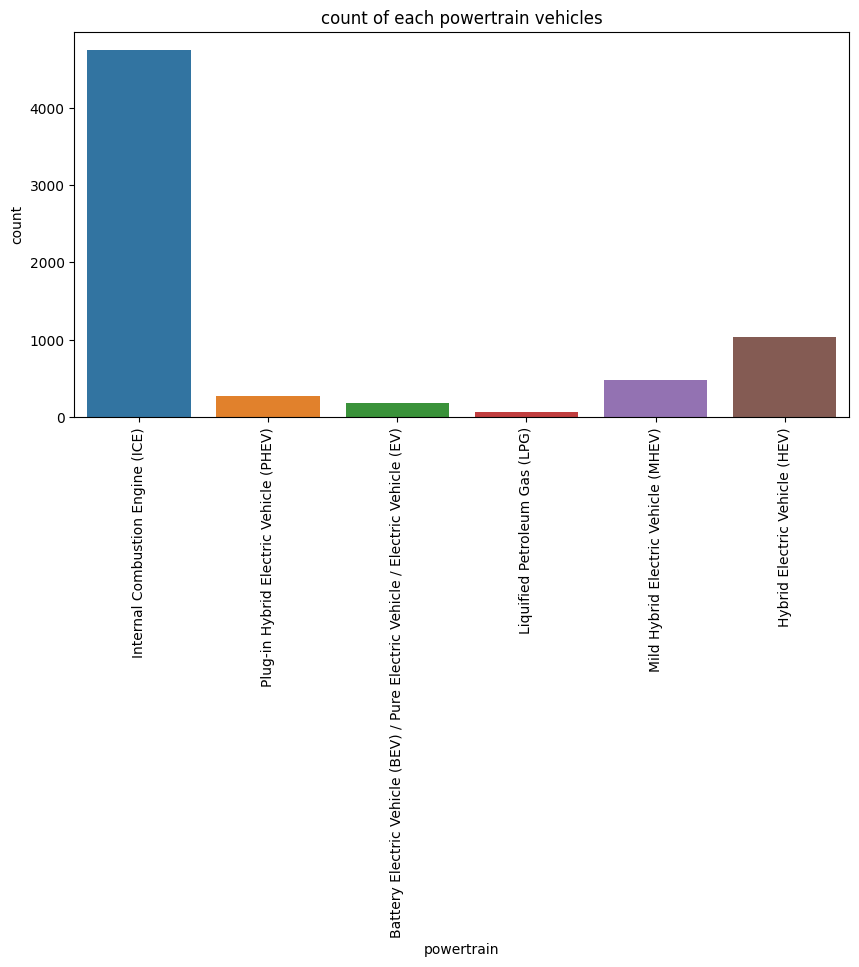

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="powertrain")
plt.title("count of each powertrain vehicles")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Internal Combustion Engine (ICE)'),
  Text(1, 0, 'Plug-in Hybrid Electric Vehicle (PHEV)'),
  Text(2, 0, 'Battery Electric Vehicle (BEV) / Pure Electric Vehicle / Electric Vehicle (EV)'),
  Text(3, 0, 'Liquified Petroleum Gas (LPG)'),
  Text(4, 0, 'Mild Hybrid Electric Vehicle (MHEV)'),
  Text(5, 0, 'Hybrid Electric Vehicle (HEV)')])

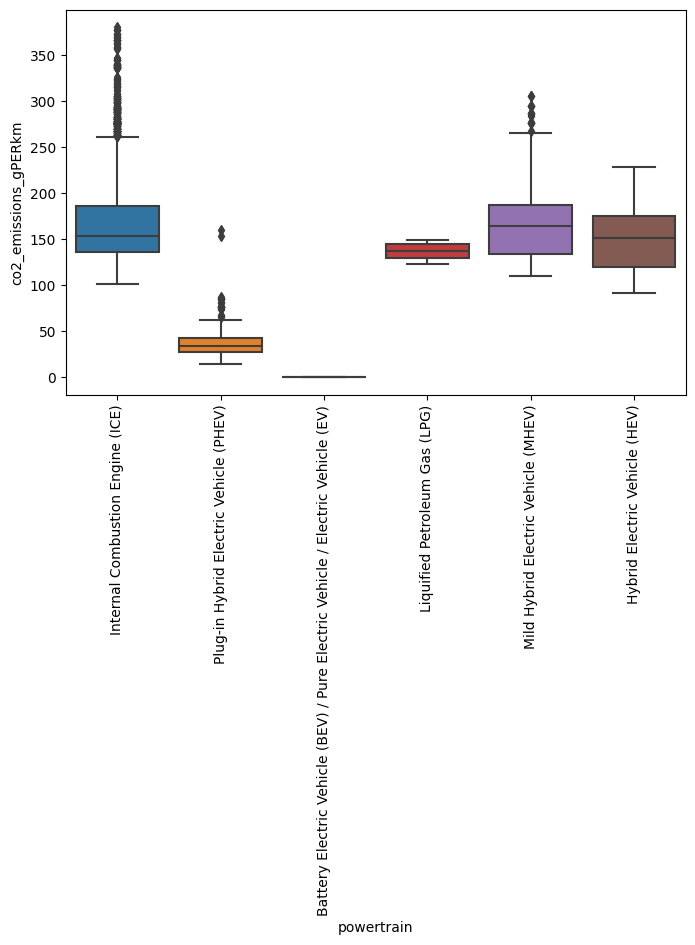

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="powertrain",y="co2_emissions_gPERkm",data=df)
plt.xticks(rotation=90)

Observation:

> The Internal Combustion Engine (ICE) has a high number

> outliers are there in all categories except Battery Electric Vehicle (BEV) / Pure Electric Vehicle / Electric Vehicle (EV).





POWER in ps unit Feature(univariate) visualization with target variables

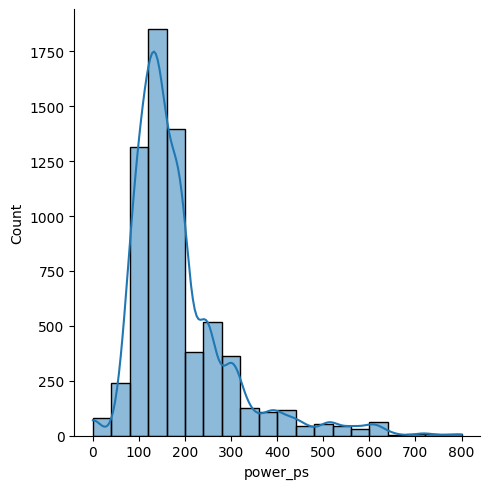

In [ ]:
sns.displot(data=df,x="power_ps",kde=True,bins=20)

<Axes: xlabel='co2_emissions_gPERkm', ylabel='power_ps'>

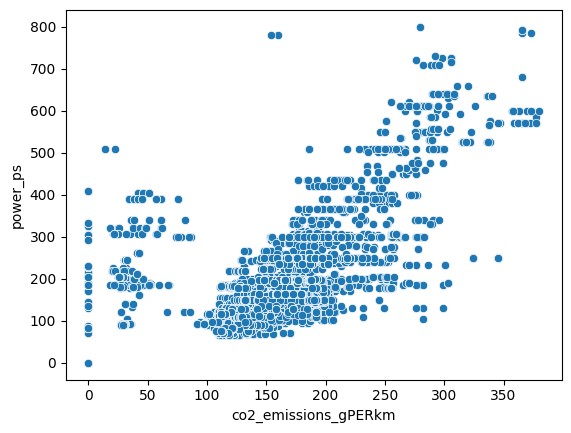

In [ ]:
sns.scatterplot(x="co2_emissions_gPERkm",y="power_ps",data=df)

observation:

> the data is well distributed with target feature

>





CO2 Emission(carbon-di-oxide) -target feature

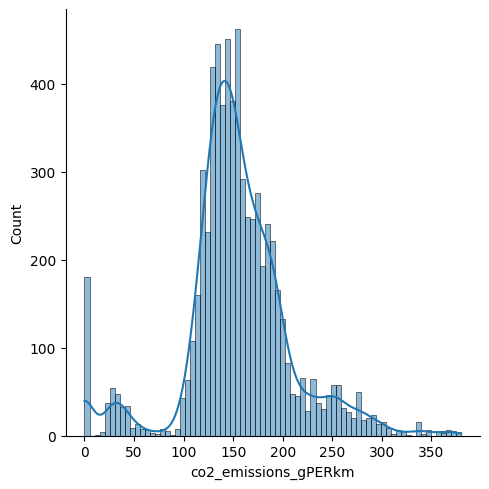

In [ ]:
sns.displot(data=df,x="co2_emissions_gPERkm",kde=True)

FEATURE ENGINEERING

In [ ]:
df.head()

,car_id,manufacturer,model,description,transmission,transmission_type,engine_size_cm3,fuel,powertrain,power_ps,co2_emissions_gPERkm
0,1.0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,161.0
1,2.0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,153.0
2,3.0,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,169.0
3,4.0,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,162.0
4,5.0,ABARTH,595,595 1.4 145 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,169.0


In [ ]:
# coping the dataset in df_1 and droping car_id
df_1=df.drop(["car_id"], axis=1)

In [ ]:
#displaying columns of dataset
df_1.columns

Index(['manufacturer', 'model', 'description', 'transmission',
       'transmission_type', 'engine_size_cm3', 'fuel', 'powertrain',
       'power_ps', 'co2_emissions_gPERkm'],
      dtype='object')

car_id is dropped from the x

In [ ]:
#categorical columns name are stored in cat_column list
filt=df_1.dtypes[df.dtypes==np.object]
cat_column=list(filt.index)
cat_column

['manufacturer',
 'model',
 'description',
 'transmission',
 'transmission_type',
 'fuel',
 'powertrain']

In [ ]:
## label encoding the categorical feature
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in cat_column:
  df_1[i]=encoder.fit_transform(df_1[i])


In [ ]:
#removing outliers using Z_score metod
from scipy import stats
z_score = np.abs(stats.zscore(df_1[df_1.columns]))
threshold = 3
outlier_indices = np.where(z_score>threshold)[0]
df_1= df_1.drop(df_1.index[outlier_indices])

In [ ]:
df.shape

(6756, 11)

In [ ]:
df_1.shape

(6284, 10)

the row are reduced from 6756 to 6284

In [ ]:
#separating the dataset into independent and target feature
x=df_1.iloc[:,:-1]
y=df_1.iloc[:,-1]

In [ ]:
x.head()

,manufacturer,model,description,transmission,transmission_type,engine_size_cm3,fuel,powertrain,power_ps
0,0,12,280,32,2,1368.0,5,2,145.0
1,0,12,280,32,2,1368.0,5,2,145.0
2,0,12,989,32,2,1368.0,5,2,145.0
3,0,12,988,32,2,1368.0,5,2,145.0
4,0,12,990,32,2,1368.0,5,2,145.0


In [ ]:
#splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=34)

In [ ]:
#standard scaling the independent features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

MODEL CREATION

1)LINEAR regression using gridsearchCV

In [ ]:
#fitting the model with train data
from sklearn.linear_model import LinearRegression
model_1=LinearRegression()
model_1.fit(x_train,y_train)

LinearRegression()

In [ ]:
#predicting the values using the model
y1_pred=model_1.predict(x_test)

In [ ]:
#Evaluating the model performance
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error
import math
y1_r2=r2_score(y1_pred,y_test)
y1_mse=mean_squared_error(y1_pred,y_test)
y1_rmse=math.sqrt(y1_mse)
y1_mape=mean_absolute_percentage_error(y1_pred,y_test)
print(y1_r2)

0.4701542713105664


ASSUMPTION FOR LINEAR REGRESSION

Assumption-1)LINEAR RELATIONSHI

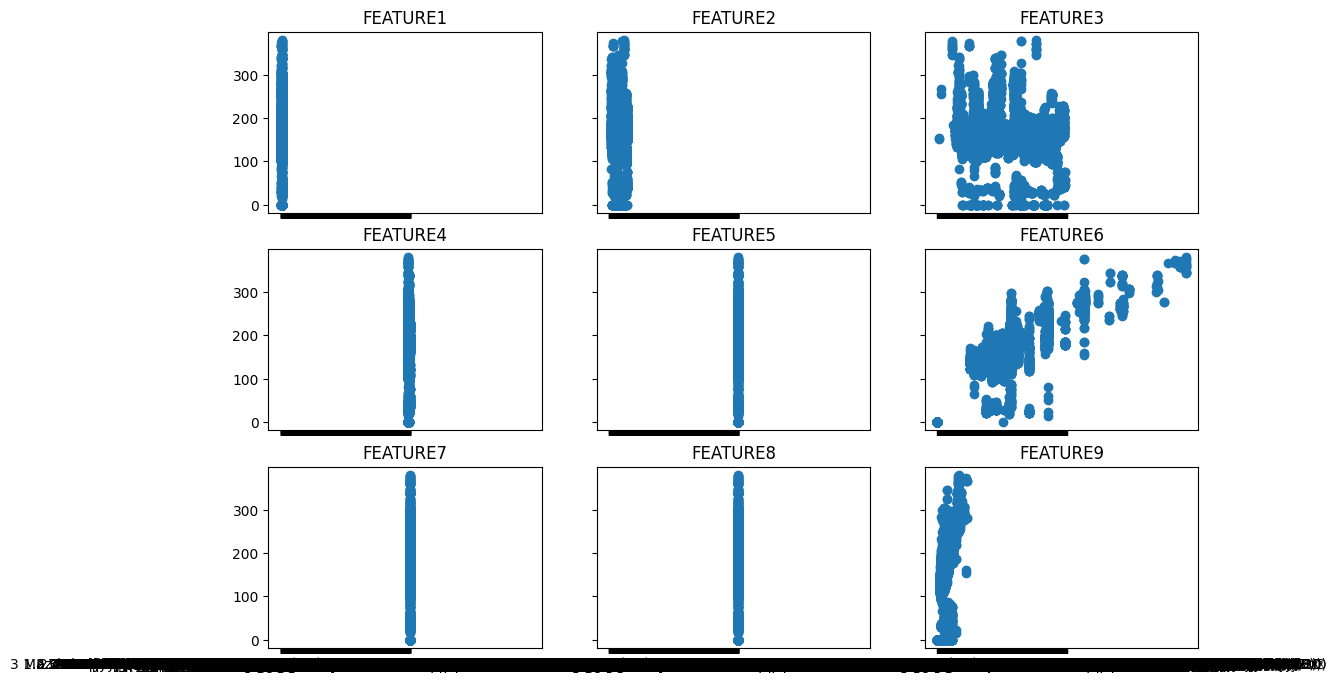

In [ ]:
fig, axes=plt.subplots(nrows=3, ncols=3,figsize=(12,8),sharex=True, sharey=True)
axes[0,0].scatter(df['manufacturer'],df['co2_emissions_gPERkm'])
axes[0,0].set_title("FEATURE1")
axes[0,1].scatter(df['model'],df['co2_emissions_gPERkm'])
axes[0,1].set_title("FEATURE2")
axes[0,2].scatter(df['description'],df['co2_emissions_gPERkm'])
axes[0,2].set_title("FEATURE3")
axes[1,0].scatter(df['transmission'],df['co2_emissions_gPERkm'])
axes[1,0].set_title("FEATURE4")
axes[1,1].scatter(df["transmission_type"],df['co2_emissions_gPERkm'])
axes[1,1].set_title("FEATURE5")
axes[1,2].scatter(df["engine_size_cm3"],df['co2_emissions_gPERkm'])
axes[1,2].set_title("FEATURE6")
axes[2,0].scatter(df["fuel"],df['co2_emissions_gPERkm'])
axes[2,0].set_title("FEATURE7")
axes[2,1].scatter(df["powertrain"],df['co2_emissions_gPERkm'])
axes[2,1].set_title("FEATURE8")
axes[2,2].scatter(df["power_ps"],df['co2_emissions_gPERkm'])
axes[2,2].set_title("FEATURE9")

plt.show()




Assumption-2)multicollinearity is done before

Assumption-3)Normality residual

In [ ]:
residual=y_test-y1_pred

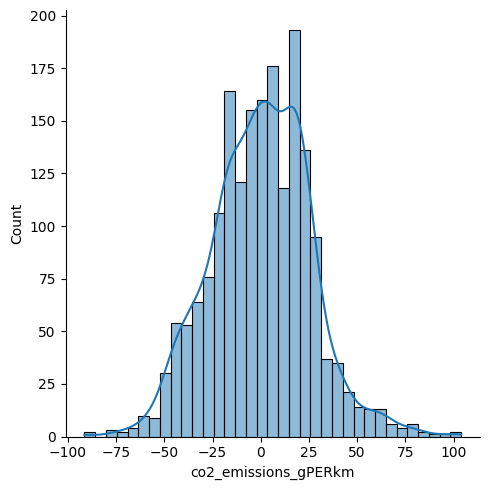

In [ ]:
sns.displot(residual,kde=True)

((array([-3.37621312, -3.12404131, -2.9841047 , ...,  2.9841047 ,
          3.12404131,  3.37621312]),
  array([-91.39212082, -91.36533737, -78.93395197, ...,  96.91180459,
         103.28146664, 103.92218434])),
 (25.7714617001405, 0.2356819377553817, 0.9965643957649115))

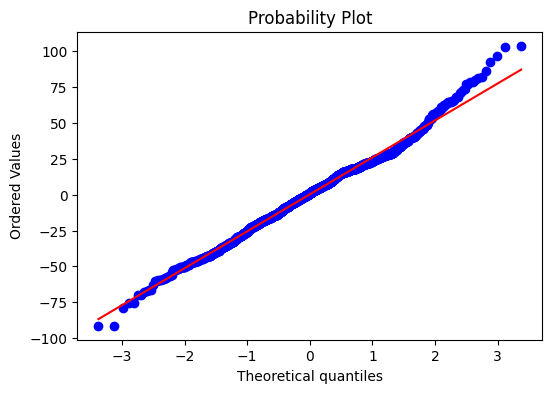

In [ ]:
import scipy as sp
fig,ax=plt.subplots(figsize=(6,4))
sp.stats.probplot(residual,plot=ax,fit=True)

Assumption-4)Homoscedasity

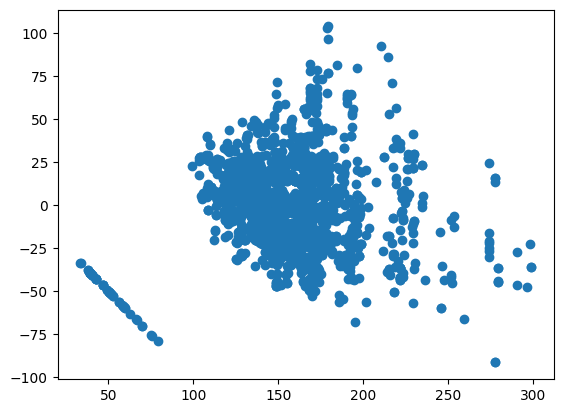

In [ ]:
plt.scatter(y1_pred,residual)

Assumption-5)Autocorrelation of residuals

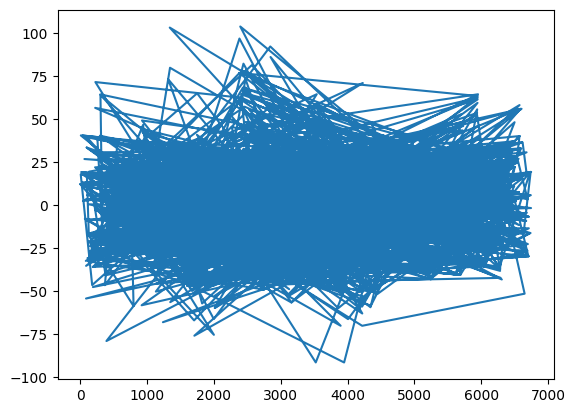

In [ ]:
plt.plot(residual)

K_NEAREST_NEIGHBORS

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,r2_score

In [ ]:
#finding the least generalized gap of k_neighbors count
train_rscore=[]
test_rscore=[]
k=[]
for i in range(1,51):
  knn=KNeighborsRegressor(n_neighbors=i)
  knn.fit(x_train,y_train)
  train_rscore.append(r2_score(y_train,knn.predict(x_train)))
  test_rscore.append(r2_score(y_test,knn.predict(x_test)))
  k.append(i)

In [ ]:
result_knn=pd.DataFrame()
result_knn['k_values']=k
result_knn['train_rscore']=train_rscore
result_knn['test_rscore']=test_rscore
result_knn['gen_gap']=abs(result_knn['train_rscore']-result_knn['test_rscore'])

In [ ]:
#sorting the dataframe based on gen_gap
result_knn.sort_values(by=['gen_gap'], ascending=True)

,k_values,train_rscore,test_rscore,gen_gap
40,41,0.838472,0.835192,0.003280
46,47,0.833326,0.830015,0.003311
45,46,0.834287,0.830926,0.003361
47,48,0.832028,0.828645,0.003382
42,43,0.836934,0.833494,0.003440
41,42,0.837685,0.834244,0.003441
48,49,0.830324,0.826851,0.003472
43,44,0.836165,0.832612,0.003553
49,50,0.828787,0.825128,0.003659
44,45,0.835192,0.831508,0.003684


k_value=41 has least generalization gap.so choosing k_value=41

<Axes: >

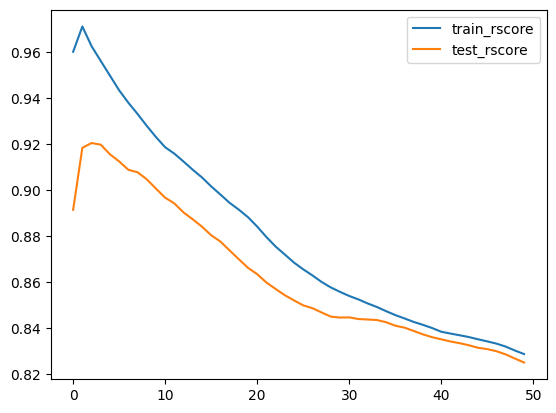

In [ ]:
result_knn[['train_rscore','test_rscore']].plot()

In [ ]:
model_2=KNeighborsRegressor(n_neighbors=41)
model_2.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=41)

In [ ]:
y2_pred=model_2.predict(x_test)
y2_pred

array([133.87804878, 178.04878049, 245.07317073, ..., 211.24390244,
       143.34146341, 130.90243902])

In [ ]:
y2_r2=r2_score(y2_pred,y_test)
y2_mse=mean_squared_error(y2_pred,y_test)
y2_rmse=math.sqrt(y2_mse)
y2_mape=mean_absolute_percentage_error(y2_pred,y_test)
print(y2_r2)
print(y2_mse)
print(y2_mape)

0.8005879362615085
323.3655625249577
0.07923747691236728


RANDOM FOREST REGRESSION(BAGGING TECHNIQUE)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
random_grid = {'n_estimators': [100,200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [5,8,10],
               'min_samples_split': [2,4,6],
               'min_samples_leaf': [1,2,4],
               }
model_3 = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3, verbose=2, n_jobs = -1)
model_3.fit(x_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200]},
             verbose=2)

In [ ]:
y3_pred=model_3.predict(x_test)
y3_pred

array([126.16730076, 180.08521993, 258.16818446, ..., 175.81631608,
       155.43470237, 120.74433163])

In [ ]:
y3_r2=r2_score(y3_pred,y_test)
y3_mse=mean_squared_error(y3_pred,y_test)
y3_rmse=math.sqrt(y3_mse)
y3_mape=mean_absolute_percentage_error(y3_pred,y_test)
print(y3_r2)
print(y3_mse)
print(y3_mape)

0.8678359409777368
213.3841279911524
0.06403473048505035


XGBOOST-EXTRA GRADIENT BOOSTING TECHNIQUE


In [ ]:
from xgboost import XGBRegressor
regressor=XGBRegressor(eval_metric='rmsle')

In [ ]:
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(x_train, y_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 6, 'n_estimators': 700}


In [ ]:
model_4=XGBRegressor(learning_rate=0.015,
                     n_estimators=700,
                     max_depth=6,
                     eval_metric='rmsle')

model_4.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.015, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=700, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y4_pred=model_4.predict(x_test)
y4_pred

array([118.37425, 182.34682, 258.51895, ..., 199.63026, 154.36662,
       121.73285], dtype=float32)

In [ ]:
y4_r2=r2_score(y4_pred,y_test)
y4_mse=mean_squared_error(y4_pred,y_test)
y4_rmse=math.sqrt(y4_mse)
y4_mape=mean_absolute_percentage_error(y4_pred,y_test)
print(y4_r2)
print(y4_mse)
print(y4_mape)

0.8862104475954933
190.46120519564727
0.09170953730259253


CATBOOST(BOOSTING TECHNIQUE)

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.8 MB/s eta 0:00:00


In [ ]:
import catboost as cb
from catboost import CatBoostRegressor,Pool


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6284 entries, 0 to 6745
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   manufacturer          6284 non-null   int64  
 1   model                 6284 non-null   int64  
 2   description           6284 non-null   int64  
 3   transmission          6284 non-null   int64  
 4   transmission_type     6284 non-null   int64  
 5   engine_size_cm3       6284 non-null   float64
 6   fuel                  6284 non-null   int64  
 7   powertrain            6284 non-null   int64  
 8   power_ps              6284 non-null   float64
 9   co2_emissions_gPERkm  6284 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 540.0 KB


In [ ]:
x1=df_1.iloc[:,:-1]
y1=df_1.iloc[:,-1]

In [ ]:
x1["power_ps"] = x1["power_ps"].astype(np.int)
x1["engine_size_cm3"] = x1["engine_size_cm3"].astype(np.int)

In [ ]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.33,random_state=43)

In [ ]:
y1_test

1142    189.0
6383    175.0
3839    167.0
1545    152.0
4007    193.0
        ...  
3681    151.0
4323    218.0
2158    158.0
3274    273.0
4293    251.0
Name: co2_emissions_gPERkm, Length: 2074, dtype: float64

In [ ]:
pool_train=Pool(x1_train,y1_train,cat_features=cat_column)

In [ ]:
pool_test=Pool(x1_test,y1_test,cat_features=cat_column)

In [ ]:
model_5=CatBoostRegressor()
model_5.fit(pool_train)

Learning rate set to 0.051383
0:	learn: 42.9617548	total: 55.1ms	remaining: 55.1s
1:	learn: 41.4434669	total: 62.8ms	remaining: 31.3s
2:	learn: 40.0711151	total: 66.5ms	remaining: 22.1s
3:	learn: 38.7239115	total: 74.2ms	remaining: 18.5s
4:	learn: 37.4467292	total: 80.9ms	remaining: 16.1s
5:	learn: 36.1661254	total: 88.2ms	remaining: 14.6s
6:	learn: 34.9268569	total: 94.4ms	remaining: 13.4s
7:	learn: 33.7739845	total: 99.7ms	remaining: 12.4s
8:	learn: 32.7276759	total: 109ms	remaining: 12s
9:	learn: 31.6920871	total: 115ms	remaining: 11.4s
10:	learn: 30.7599843	total: 121ms	remaining: 10.8s
11:	learn: 29.8724881	total: 125ms	remaining: 10.3s
12:	learn: 29.0382152	total: 130ms	remaining: 9.83s
13:	learn: 28.2821685	total: 138ms	remaining: 9.69s
14:	learn: 27.5633773	total: 143ms	remaining: 9.4s
15:	learn: 26.8480172	total: 148ms	remaining: 9.12s
16:	learn: 26.1830080	total: 154ms	remaining: 8.91s
17:	learn: 25.5056251	total: 160ms	remaining: 8.75s
18:	learn: 24.8859684	total: 167ms	rema

In [ ]:
y5_pred=model_5.predict(x1_test)

In [ ]:
y5_r2=r2_score(y5_pred,y1_test)
y5_mse=mean_squared_error(y5_pred,y1_test)
y5_rmse=math.sqrt(y5_mse)
y5_mape=mean_absolute_percentage_error(y5_pred,y1_test)
print(y5_r2)
print(y5_mse)
print(y5_mape)

0.9315273910666588
115.13294709858266
0.07380592921134449


LIGTHGBM

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lbt

In [ ]:
model_6=lbt.LGBMRegressor(use_gpu=True)
model_6.fit(x_train,y_train)

[LightGBM] [Warning] Unknown parameter: use_gpu


LGBMRegressor(use_gpu=True)

In [ ]:
y6_pred=model_6.predict(x_test)
y6_pred

array([122.76272973, 181.51375737, 262.55791521, ..., 175.69527367,
       155.49808185, 120.84997499])

In [ ]:
y6_r2=r2_score(y6_pred,y_test)
y6_mse=mean_squared_error(y6_pred,y_test)
y6_rmse=math.sqrt(y6_mse)
y6_mape=mean_absolute_percentage_error(y6_pred,y_test)
print(y6_r2)
print(y6_mse)
print(y6_mape)

0.8636880191569827
222.0179019020705
0.0935862552879551


PRINCIPLE COMPONENT ANALYSIS

In [ ]:
x_pca=df_1.iloc[:,:-1]
y_pca=df_1.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_pca=scaler.fit_transform(x_pca)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)

In [ ]:
x_pca=pca.fit_transform(x_pca)
x_pca

array([[-1.85600438, -2.40414805, -0.01317675],
       [-1.85600438, -2.40414805, -0.01317675],
       [-2.01490045, -2.11235035,  0.4227813 ],
       ...,
       [ 2.35664141,  0.43938307,  0.96063967],
       [ 2.15980751, -0.01017581, -0.41037051],
       [ 2.35664141,  0.43938307,  0.96063967]])

In [ ]:
x_pca=pd.DataFrame(x_pca)
x_pca

,0,1,2
0,-1.856004,-2.404148,-0.013177
1,-1.856004,-2.404148,-0.013177
2,-2.014900,-2.112350,0.422781
3,-2.014676,-2.112762,0.422166
4,-2.015125,-2.111939,0.423396
...,...,...,...
6279,2.357986,0.436914,0.956950
6280,2.159808,-0.010176,-0.410371
6281,2.356641,0.439383,0.960640
6282,2.159808,-0.010176,-0.410371


In [ ]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test=train_test_split(x_pca,y_pca,test_size=0.33,random_state=44)


Linear regression with pca

In [ ]:
from sklearn.linear_model import LinearRegression
model_1_pca=LinearRegression()
model_1_pca.fit(x2_train,y2_train)

LinearRegression()

In [ ]:
y1_pred_pca=model_1_pca.predict(x2_test)
y1_pred_pca

array([160.86119231, 132.62715184, 157.92919777, ..., 184.79183971,
       132.81281591, 135.27017695])

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error
y1_r2_pca=r2_score(y1_pred_pca,y2_test)
y1_mse_pca=mean_squared_error(y1_pred_pca,y2_test)
y1_rmse_pca=math.sqrt(y1_mse_pca)
y1_mape_pca=mean_absolute_percentage_error(y2_test,y1_pred_pca,)
print(y1_r2_pca)

0.026049238417819143


K_NEAREST NEIGHBORS WITH PCA

In [ ]:
#finding the least generalized gap of k_neighbors count
train_rscore_pca=[]
test_rscore_pca=[]
k_pca=[]
for i in range(1,51):
  knn_pca=KNeighborsRegressor(n_neighbors=i)
  knn_pca.fit(x2_train,y2_train)
  train_rscore_pca.append(r2_score(y2_train,knn_pca.predict(x2_train)))
  test_rscore_pca.append(r2_score(y2_test,knn_pca.predict(x2_test)))
  k_pca.append(i)


In [ ]:
result_knn_pca=pd.DataFrame()
result_knn_pca['k_values_pca']=k_pca
result_knn_pca['train_rscore_pca']=train_rscore_pca
result_knn_pca['test_rscore_pca']=test_rscore_pca
result_knn_pca['gen_gap_pca']=abs(result_knn_pca['train_rscore_pca']-result_knn_pca['test_rscore_pca'])

In [ ]:
#sorting the dataframe based on gen_gap
result_knn_pca.sort_values(by=['gen_gap_pca'], ascending=True)

,k_values_pca,train_rscore_pca,test_rscore_pca,gen_gap_pca
13,14,0.849803,0.834440,0.015363
14,15,0.842769,0.826630,0.016140
12,13,0.856525,0.839873,0.016652
15,16,0.835974,0.818579,0.017395
20,21,0.810908,0.793397,0.017512
21,22,0.807713,0.789905,0.017808
23,24,0.800240,0.782304,0.017936
22,23,0.803471,0.785489,0.017982
11,12,0.863472,0.845426,0.018046
16,17,0.830198,0.812059,0.018139


k_value=14 has least generalization gap.so choosing k_value=14

<Axes: >

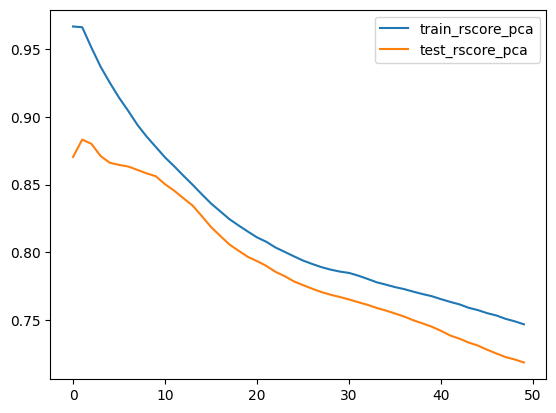

In [ ]:

result_knn_pca[['train_rscore_pca','test_rscore_pca']].plot()

In [ ]:
model_2_pca=KNeighborsRegressor(n_neighbors=14)
model_2_pca.fit(x2_train,y2_train)

KNeighborsRegressor(n_neighbors=14)

In [ ]:
y2_pred_pca=model_2_pca.predict(x2_test)
y2_pred_pca

array([149.28571429, 138.5       , 153.21428571, ..., 160.5       ,
       155.78571429, 163.35714286])

In [ ]:
y2_r2_pca=r2_score(y2_pred_pca,y2_test)
y2_mse_pca=mean_squared_error(y2_pred_pca,y2_test)
y2_rmse_pca=math.sqrt(y2_mse_pca)
y2_mape_pca=mean_absolute_percentage_error(y2_pred_pca,y2_test)
print(y2_r2_pca)
print(y2_mse_pca)
print(y2_mape_pca)

0.7899659823466815
315.51552752248443
0.07777782392911743


random forest with PCA

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
random_grid = {'n_estimators': [100,200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [5,8,10],
               'min_samples_split': [2,4,6],
               'min_samples_leaf': [1,2,4],
               }
model_3_pca = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3, verbose=2, n_jobs = -1)


In [ ]:
model_3_pca.fit(x2_train, y2_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200]},
             verbose=2)

In [ ]:
y3_pred_pca=model_3_pca.predict(x2_test)
y3_pred_pca

array([151.52290899, 139.39294944, 154.5550527 , ..., 163.41968494,
       148.23424198, 171.94690449])

In [ ]:
y3_r2_pca=r2_score(y3_pred_pca,y2_test)
y3_mse_pca=mean_squared_error(y3_pred_pca,y2_test)
y3_rmse_pca=math.sqrt(y3_mse_pca)
y3_mape_pca=mean_absolute_percentage_error(y3_pred_pca,y2_test)
print(y3_r2_pca)
print(y3_mse_pca)
print(y3_mape_pca)

0.8498340569650544
234.42814842013226
0.07389361044173551


XGBOOST WITH PCA

In [ ]:
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(x2_train, y2_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 6, 'n_estimators': 700}


In [ ]:
model_4_pca=XGBRegressor(learning_rate=0.015,
                     n_estimators=700,
                     max_depth=6,
                     eval_metric='rmsle')

model_4_pca.fit(x2_train,y2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.015, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=700, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y4_pred_pca=model_4_pca.predict(x2_test)
y4_pred_pca

array([152.99474, 140.11299, 154.28922, ..., 167.45793, 142.78539,
       167.20692], dtype=float32)

In [ ]:
y4_r2_pca=r2_score(y4_pred_pca,y2_test)
y4_mse_pca=mean_squared_error(y4_pred_pca,y2_test)
y4_rmse_pca=math.sqrt(y4_mse_pca)
y4_mape_pca=mean_absolute_percentage_error(y4_pred_pca,y2_test)
print(y4_r2_pca)
print(y4_mse_pca)
print(y4_mape_pca)

0.8226706863915307
263.6948863614622
0.09432393981307416


CATBOOST with PCA

the best accuracy with catboost is 93%.the catboost algorthim is used with pca

In [ ]:
pool_train=Pool(x2_train,y2_train)
pool_test=Pool(x2_test,y2_test)

In [ ]:
model_5_pca=CatBoostRegressor()
model_5_pca.fit(pool_train)

Learning rate set to 0.051383
0:	learn: 43.1079047	total: 1.68ms	remaining: 1.68s
1:	learn: 41.8005488	total: 2.85ms	remaining: 1.42s
2:	learn: 40.5672410	total: 3.95ms	remaining: 1.31s
3:	learn: 39.3922895	total: 5.06ms	remaining: 1.26s
4:	learn: 38.3566252	total: 6.12ms	remaining: 1.22s
5:	learn: 37.2774670	total: 7.21ms	remaining: 1.19s
6:	learn: 36.3982171	total: 8.31ms	remaining: 1.18s
7:	learn: 35.4883115	total: 9.42ms	remaining: 1.17s
8:	learn: 34.6939064	total: 10.5ms	remaining: 1.16s
9:	learn: 33.9749645	total: 11.6ms	remaining: 1.15s
10:	learn: 33.2534144	total: 12.7ms	remaining: 1.15s
11:	learn: 32.6490439	total: 14.1ms	remaining: 1.16s
12:	learn: 31.9965013	total: 15.4ms	remaining: 1.17s
13:	learn: 31.4632372	total: 16.7ms	remaining: 1.17s
14:	learn: 30.8997871	total: 18ms	remaining: 1.18s
15:	learn: 30.3079215	total: 19.3ms	remaining: 1.19s
16:	learn: 29.8045817	total: 20.4ms	remaining: 1.18s
17:	learn: 29.3167619	total: 21.7ms	remaining: 1.18s
18:	learn: 28.9078299	total:

In [ ]:
y5_pred_pca=model_5_pca.predict(x2_test)

In [ ]:
y5_r2_pca=r2_score(y5_pred_pca,y2_test)
y5_mse_pca=mean_squared_error(y5_pred_pca,y2_test)
y5_rmse_pca=math.sqrt(y5_mse_pca)
y5_mape_pca=mean_absolute_percentage_error(y5_pred_pca,y2_test)
print(y5_r2_pca)
print(y5_mse_pca)
print(y5_mape_pca)

0.839094442597605
245.85546358191806
0.09318867498400006


LIGHTBGM with PCA

In [ ]:
model_6_pca=lbt.LGBMRegressor(use_gpu=True)
model_6_pca.fit(x2_train,y2_train)





[LightGBM] [Warning] Unknown parameter: use_gpu


LGBMRegressor(use_gpu=True)

In [ ]:
y6_pred_pca=model_6_pca.predict(x2_test)
y6_pred_pca

array([152.41004013, 139.47447617, 154.87150919, ..., 163.84504919,
       154.88939184, 174.78737484])

In [ ]:
y6_r2_pca=r2_score(y6_pred_pca,y2_test)
y6_mse_pca=mean_squared_error(y6_pred_pca,y2_test)
y6_rmse_pca=math.sqrt(y6_mse_pca)
y6_mape_pca=mean_absolute_percentage_error(y6_pred_pca,y2_test)
print(y6_r2_pca)
print(y6_mse_pca)
print(y6_mape_pca)

0.8387227365939145
248.76875384467706
0.09329138150298963


classification of metrics

In [ ]:
lr=[y1_r2,y1_mse,y1_rmse,y1_mape]
knn=[y2_r2,y2_mse,y2_rmse,y2_mape]
rf=[y3_r2,y3_mse,y3_rmse,y3_mape]
xg=[y4_r2,y4_mse,y4_rmse,y4_mape]
cat=[y5_r2,y5_mse,y5_rmse,y5_mape]
light=[y6_r2,y6_mse,y6_rmse,y6_mape]


lr_pca=[y1_r2_pca,y1_mse_pca,y1_rmse_pca,y1_mape_pca]
knn_pca1=[y2_r2_pca,y2_mse_pca,y2_rmse_pca,y2_mape_pca]
rf_pca=[y3_r2_pca,y3_mse_pca,y3_rmse_pca,y3_mape_pca]
xg_pca=[y4_r2_pca,y4_mse_pca,y4_rmse_pca,y4_mape_pca]
cat_pca=[y5_r2_pca,y5_mse_pca,y5_rmse_pca,y5_mape_pca]
light_pca=[y6_r2_pca,y6_mse_pca,y6_rmse_pca,y6_mape_pca]

In [ ]:
models=["Linear_Regression","K_Nearest Neigbhors","Random_Forest","XGRegressor","CatBoost","LightBGM","Logistic_Regression_PCA","K_Nearest Neigbhors_PCA","Random_Forest_PCA","XGRegressor_PCA","CatBoost_PCA","LightBGM_PCA"]

result=pd.DataFrame()
result["metrics"]=["R2_score","Mean squred error","Root Mean squared error","Mean Absolute percentage error"]

result["linear_reggression"]=lr
result["K_Nearest Neigbhors"]=knn
result["Random_Forest"]=rf
result["XGRegressor"]=xg
result["CatBoost"]=cat
result["LightBGM"]=light

result["linear_reggression_PCA"]=lr_pca
result["K_Nearest Neigbhors_PCA"]=knn_pca1
result["Random_Forest_PCA"]=rf_pca
result["XGRegressor_PCA"]=xg_pca
result["CatBoost_PCA"]=cat_pca
result["LightBGM_PCA"]=light_pca
result






,metrics,linear_reggression,K_Nearest Neigbhors,Random_Forest,XGRegressor,CatBoost,LightBGM,linear_reggression_PCA,K_Nearest Neigbhors_PCA,Random_Forest_PCA,XGRegressor_PCA,CatBoost_PCA,LightBGM_PCA
0,R2_score,0.470154,0.800588,0.867836,0.886210,0.931527,0.863688,2.604924e-02,0.789966,0.849834,0.822671,0.839094,0.838723
1,Mean squred error,666.686946,323.365563,213.384128,190.461205,115.132947,222.017902,9.534776e+02,315.515528,234.428148,263.694886,245.855464,248.768754
2,Root Mean squared error,25.820282,17.982368,14.607674,13.800768,10.730002,14.900265,3.087843e+01,17.762757,15.311047,16.238685,15.679779,15.772405
3,Mean Absolute percentage error,0.148618,0.079237,0.064035,0.091710,0.073806,0.093586,1.061804e+16,0.077778,0.073894,0.094324,0.093189,0.093291


In [ ]:
result.set_index(['metrics'])

,linear_reggression,K_Nearest Neigbhors,Random_Forest,XGRegressor,CatBoost,LightBGM,linear_reggression_PCA,K_Nearest Neigbhors_PCA,Random_Forest_PCA,XGRegressor_PCA,CatBoost_PCA,LightBGM_PCA
metrics,,,,,,,,,,,,
R2_score,0.470154,0.800588,0.867836,0.886210,0.931527,0.863688,2.604924e-02,0.789966,0.849834,0.822671,0.839094,0.838723
Mean squred error,666.686946,323.365563,213.384128,190.461205,115.132947,222.017902,9.534776e+02,315.515528,234.428148,263.694886,245.855464,248.768754
Root Mean squared error,25.820282,17.982368,14.607674,13.800768,10.730002,14.900265,3.087843e+01,17.762757,15.311047,16.238685,15.679779,15.772405
Mean Absolute percentage error,0.148618,0.079237,0.064035,0.091710,0.073806,0.093586,1.061804e+16,0.077778,0.073894,0.094324,0.093189,0.093291


creating pickle

In [ ]:
import pickle

In [ ]:
filename='train_model_capstone'
pickle.dump(model_5,open(filename,'wb'))

In [ ]:
#loading the saved model
loaded_model_capstone=pickle.load(open('train_model_project','rb'))

In [ ]:
def implement(input_data):
  # changing the input_data to numpy array
  input_data_as_numpy_array = np.asarray(input_data)

  # reshape the array as we are predicting for one instance
  input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

  prediction=knn.predict(input_data_reshaped)


  return prediction
def input1():
  age=int(input("enter the age:"))
  sex=input("enter sexx:")
  bp=input("enter the level of blood pressure:")
  cholestrol=input("enter the level of chlolestral")
  na_to_k=input("enter the value of na_to_k")
  n1=0
  n2=1
  n3=2
  if(sex=="F"):
    sex=int(n1)
  else:
    sex=int(n2)
  if(bp=="HIGH"):
    bp=int(n1)
  elif(bp=="LOW"):
    bp=int(n2)
  else:
    bp=int(n3)
  if(cholestrol=="HIGH"):
    cholestrol=int(n1)
  else:
    cholestrol=int(n2)
  value=implement([age,sex,bp,cholestrol,na_to_k])
  return "the predicted values is" +str(prediction)

In [ ]:
import pickle

In [ ]:
filename='train_model_project'
pickle.dump(knn,open(filename,'wb'))

In [ ]:
#loading the saved model
loaded_model=pickle.load(open('train_model_project','rb'))

In [ ]:
df_1.columns

Index(['manufacturer', 'model', 'description', 'transmission',
       'transmission_type', 'engine_size_cm3', 'fuel', 'powertrain',
       'power_ps', 'co2_emissions_gPERkm'],
      dtype='object')